<a href="https://colab.research.google.com/github/nivi62/machine-learning/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Dataset

In [3]:
data=pd.read_csv('data.csv',date_parser=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2079,2020-05-27,8834.157227,8859.578125,8834.157227,8856.885742,8856.885742,2.914432e+10


Training Data

In [4]:
data_training = data[data['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


Testing Data

In [5]:
data_test = data[data['Date']< '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


Dropping Date column

In [6]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()


,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,26580100.0


In [7]:
#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        3.35749244e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        6.33453324e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        7.09650970e-04],
       ...,
       [3.70008086e-01, 3.67365217e-01, 3.78051927e-01, 3.74990337e-01,
        4.97548412e-01],
       [3.75325771e-01, 3.64390763e-01, 3.77862744e-01, 3.68279031e-01,
        5.07057851e-01],
       [3.68805505e-01, 3.58377151e-01, 3.72197021e-01, 3.63134123e-01,
        4.69226533e-01]])

In [28]:
X_train = []
Y_train = []
training_data.shape[0]

1932

In [29]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])


In [30]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [31]:
X_train.shape

(1872, 60, 5)

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [33]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [34]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [35]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_13 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_14 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_14 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [36]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
38/38 [==============================] - 16s 251ms/step - loss: 0.0161
Epoch 2/20
38/38 [==============================] - 8s 212ms/step - loss: 0.0050
Epoch 3/20
38/38 [==============================] - 9s 251ms/step - loss: 0.0043
Epoch 4/20
38/38 [==============================] - 10s 260ms/step - loss: 0.0041
Epoch 5/20
38/38 [==============================] - 9s 229ms/step - loss: 0.0038
Epoch 6/20
38/38 [==============================] - 9s 235ms/step - loss: 0.0039
Epoch 7/20
38/38 [==============================] - 10s 261ms/step - loss: 0.0034
Epoch 8/20
38/38 [==============================] - 10s 275ms/step - loss: 0.0034
Epoch 9/20
38/38 [==============================] - 9s 237ms/step - loss: 0.0028
Epoch 10/20
38/38 [==============================] - 9s 243ms/step - loss: 0.0028
Epoch 11/20
38/38 [==============================] - 10s 261ms/step - loss: 0.0032
Epoch 12/20
38/38 [==============================] - 10s 265ms/step - loss: 0.0027
Epoch 13/20
38/38 [

In [38]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-38-9acf82d312ed>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= past_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10


In [39]:
inputs = scaler.transform(df)
inputs

array([[0.4706426 , 0.46111744, 0.48280998, 0.47344448, 0.47088353],
       [0.47401087, 0.46123417, 0.47704822, 0.46881889, 0.4684344 ],
       [0.4693899 , 0.46753509, 0.47971984, 0.47799406, 0.58014293],
       ...,
       [0.37000809, 0.36736522, 0.37805193, 0.37499034, 0.49754841],
       [0.37532577, 0.36439076, 0.37786274, 0.36827903, 0.50705785],
       [0.36880551, 0.35837715, 0.37219702, 0.36313412, 0.46922653]])

In [40]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [41]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((1932, 60, 5), (1932,))

In [42]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

61/61 [==============================] - 5s 64ms/step


(array([[0.32863492],
        [0.32520068],
        [0.31706408],
        ...,
        [0.3284015 ],
        [0.3285811 ],
        [0.32868356]], dtype=float32),
 array([0.01497323, 0.01450668, 0.01280933, ..., 0.37000809, 0.37532577,
        0.36880551]))

In [43]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11])

In [44]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [45]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [46]:
Y_pred

array([[6342.294 ],
       [6276.0166],
       [6118.9893],
       ...,
       [6337.789 ],
       [6341.255 ],
       [6343.2324]], dtype=float32)

In [47]:
Y_test

array([ 288.96701115,  279.96298214,  247.20599413, ..., 7140.75046167,
       7243.37594972, 7117.54196566])

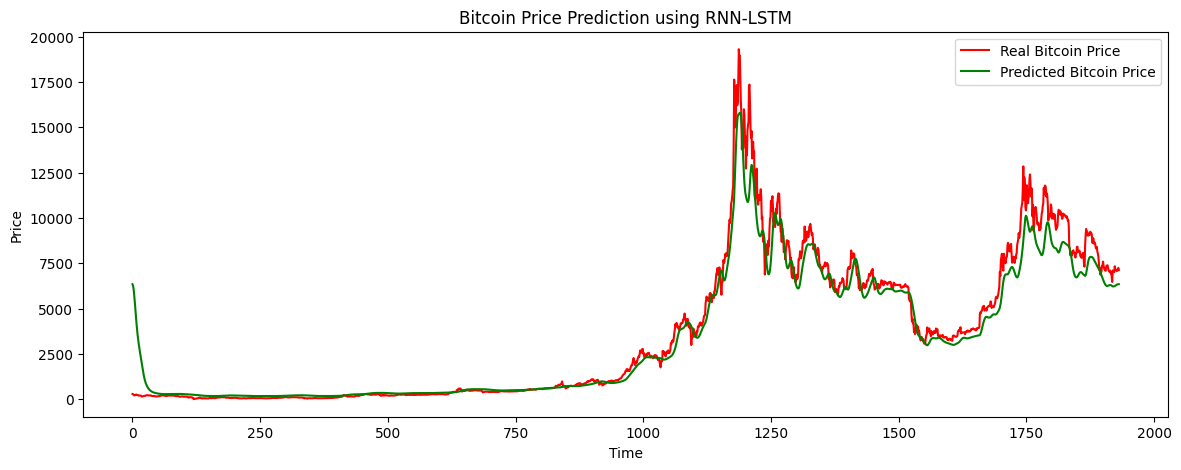

In [48]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()